In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import datajoint as dj
dj.config['database.host'] = os.environ['DJ_HOST']
dj.config['database.user'] = os.environ['DJ_USER']
dj.config['database.password'] = os.environ['DJ_PASS']
dj.config['enable_python_native_blobs'] = True
dj.config['schema_name'] = "anix_nnfabrik_bias_transfer1"
# dj.config['schema_name'] = "anix_nnfabrik_bias_transfer_test2"

import matplotlib.pyplot as plt
import numpy as np
from bias_transfer.dataset import dataset_loader
from bias_transfer.trainer import trainer
from bias_transfer.models import resnet_builder
from bias_transfer.main import *
from bias_transfer.analysis.analyzer import Analyzer


from bias_transfer.tables.trained_model import *
from bias_transfer.tables.trained_transfer_model import *
from torch import nn
import nnfabrik as nnf
# nnf.config['repos'] = ['/notebooks/nnfabrik']
# from nnfabrik.main import *
import seaborn as sns
schema

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Schema `anix_nnfabrik_bias_transfer1`

In [3]:
from bias_transfer.experiments.representation_analysis import experiments
from bias_transfer.experiments import Description
from bias_transfer.analysis.representation_analysis import compare_representations

In [4]:
a = Analyzer()

In [5]:
a.add_data(experiments, TrainedModel(), transfer_level=0)

In [7]:
from bias_transfer.experiments.representation_analysis import transfer_experiments

In [8]:
transfer_experiments.keys()

dict_keys([Description(name='CIFAR100: Noise Augmented -> Transfer (Reset)', seed=42), Description(name='CIFAR100: Noise Augmented + Noise Adv Regession -> Transfer (Reset)', seed=42), Description(name='CIFAR100: Noise Augmented + Repr. Matching -> Transfer (Reset)', seed=42), Description(name='CIFAR10: Noise Augmented -> Transfer (Reset)', seed=42), Description(name='CIFAR10: Noise Augmented + Noise Adv Regession -> Transfer (Reset)', seed=42), Description(name='CIFAR10: Noise Augmented + Repr. Matching -> Transfer (Reset)', seed=42)])

In [9]:
a.add_data(transfer_experiments, TrainedTransferModel(), transfer_level=1)

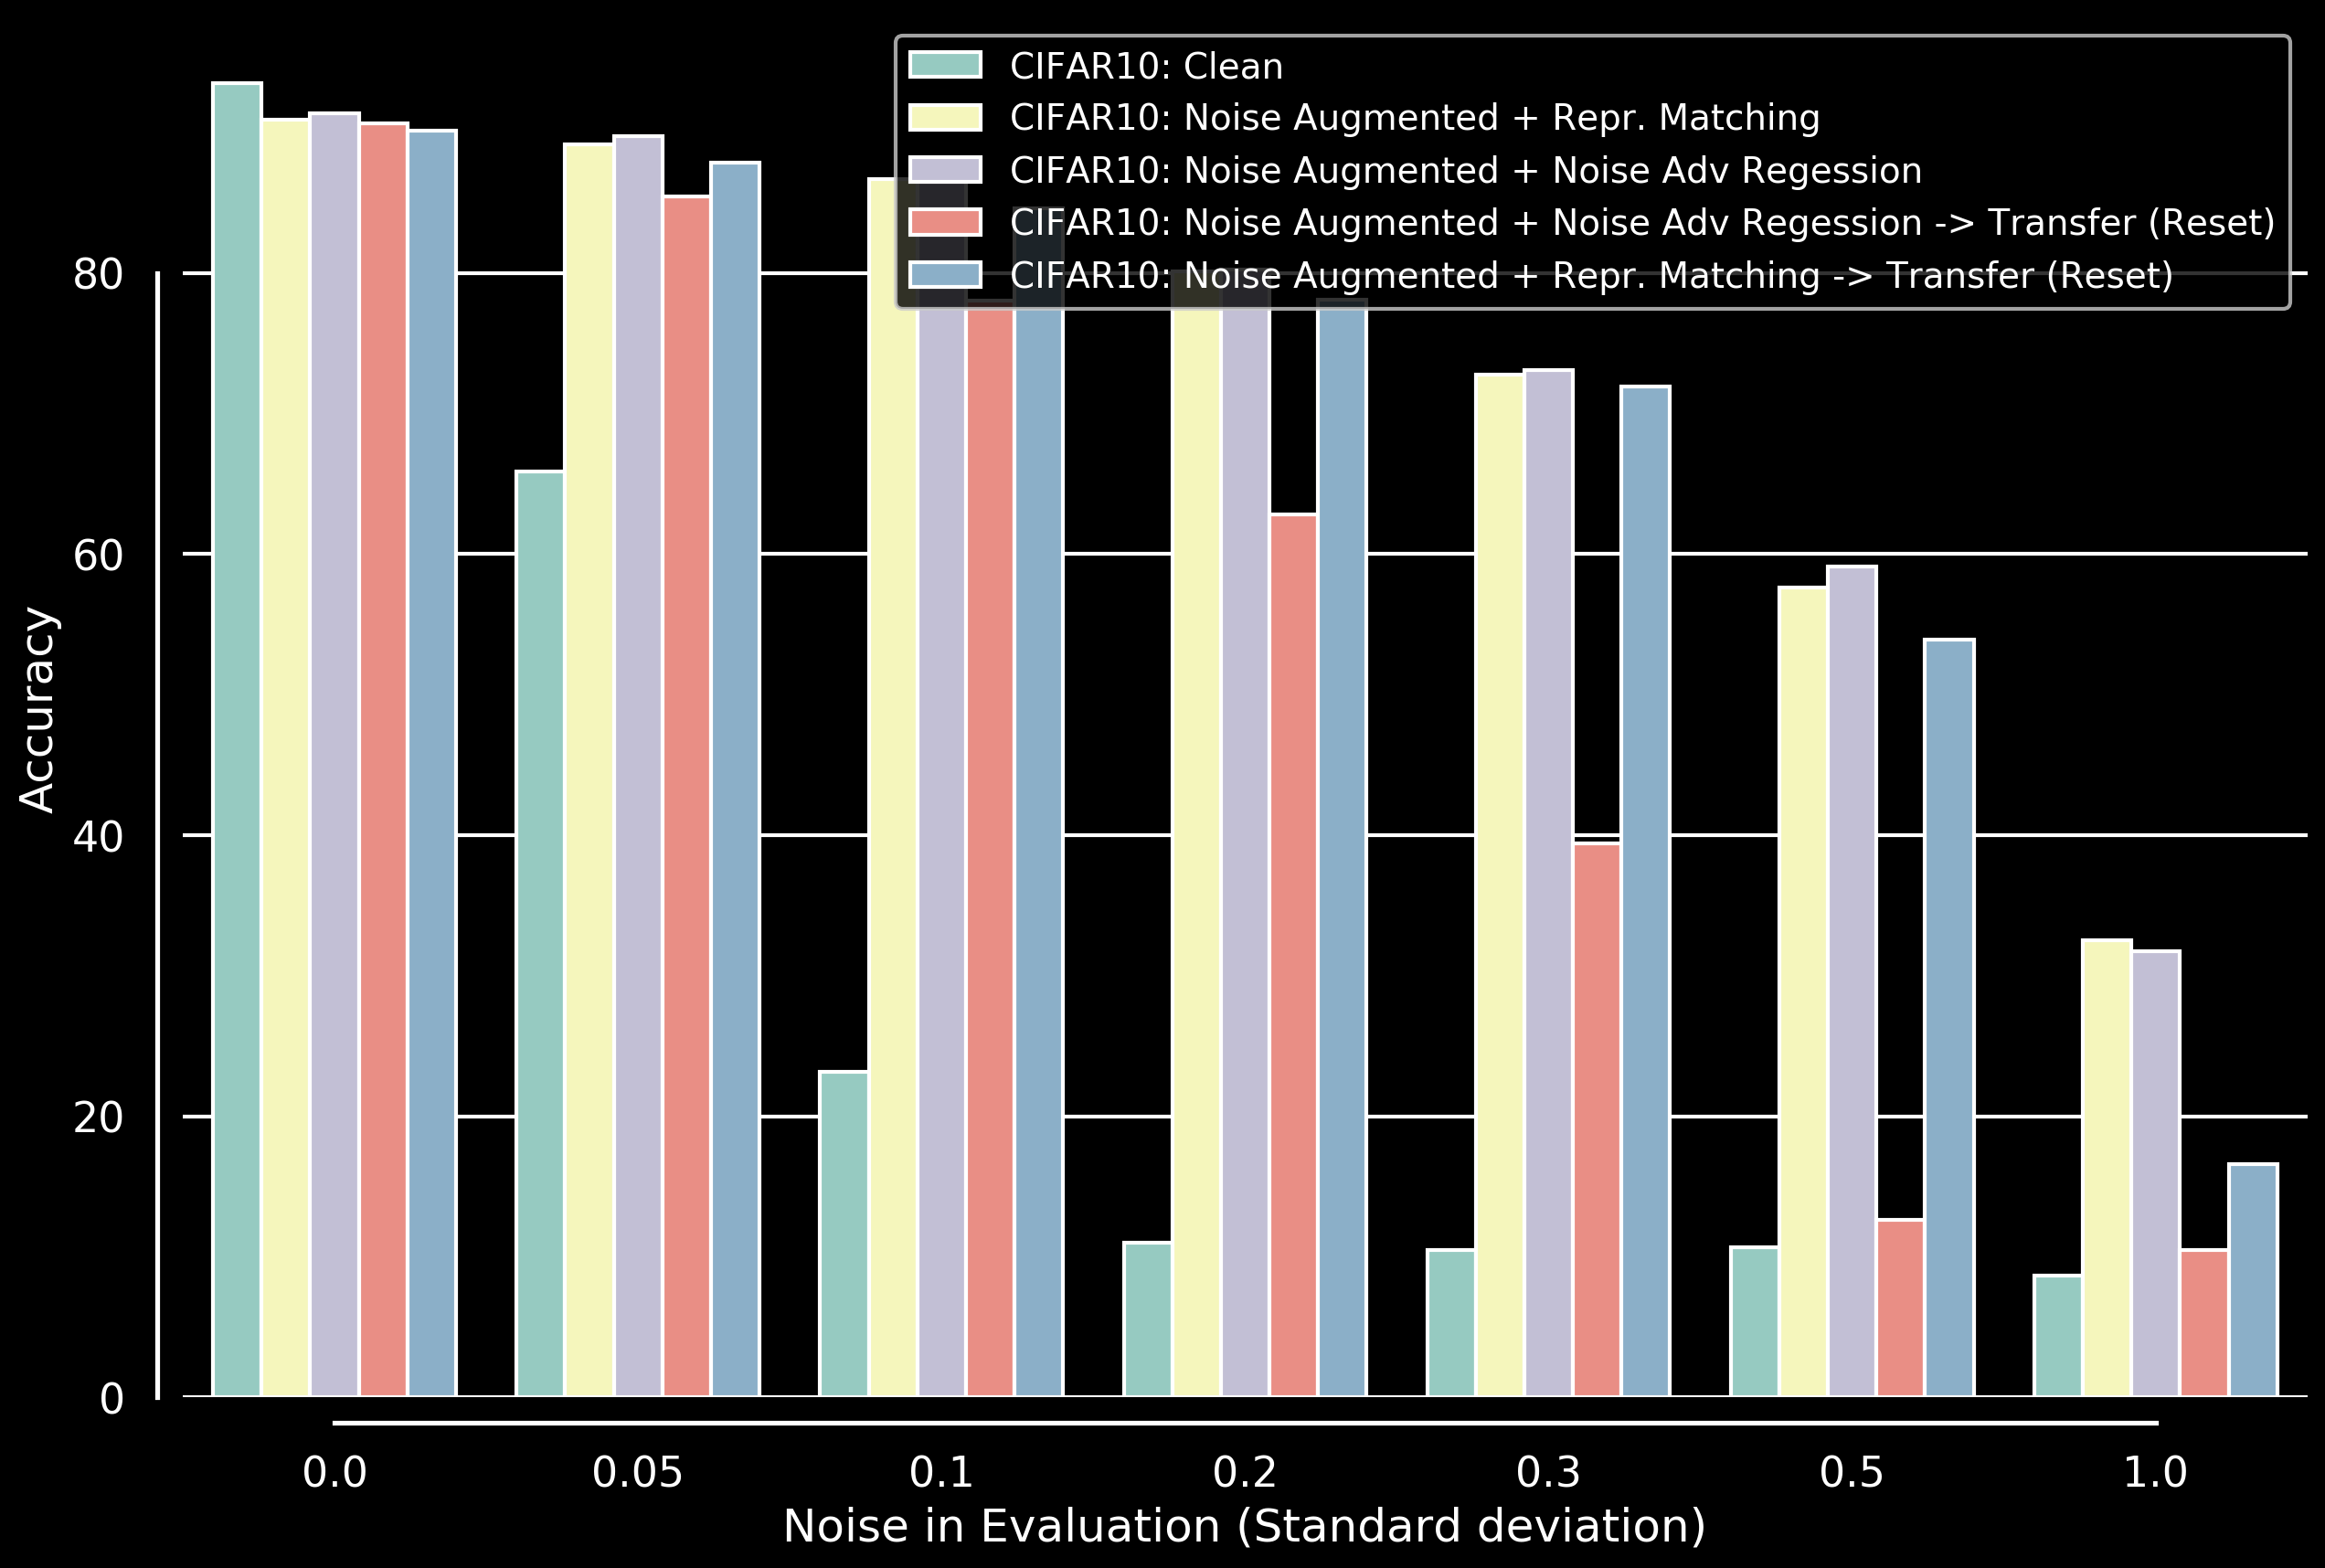

In [11]:
x = a.plot(to_plot="dev_noise_acc", 
       noise_measure="std",
       kind=None, 
       plot_method=sns.barplot,
        save="logit_matching.png"
       )

In [12]:
experiment = experiments[Description(name="CIFAR10: Clean", seed=42)]

In [13]:
clean_comparison = compare_representations(experiment, TrainedModel, dataset="train")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Model with 23520842 parameters.
==> Computing Representations
==> Building model..
Clean input


Eval Epoch 0: 100%|██████████| 704/704 [00:37<00:00, 18.78it/s, acc=98.5, loss=0.0474]

Acc: 98.47555555555556 Loss: 0.04735603815854781
Noisy input



Eval Epoch 0: 100%|██████████| 704/704 [00:38<00:00, 18.36it/s, acc=10.3, loss=4.71]

Acc: 10.277777777777779 Loss: 4.709875377741727
Clean vs. Noise: Cosine loss: 0.4682651460170746 MSE loss: 0.020771391689777374


KeyboardInterrupt: 

In [15]:
experiment = experiments[Description(name="CIFAR10: Noise Augmented + Noise Adv Regession",seed=42)]

In [ ]:
noisy_adv_comparison = compare_representations(experiment, TrainedModel, dataset="train")

In [16]:
experiment = experiments[Description(name="CIFAR10: Noise Augmented + Repr. Matching",seed=42)] 

In [ ]:
noisy_match_comparison = compare_representations(experiment, TrainedModel, dataset="train")

In [14]:
experiment = experiments[Description(name="CIFAR10: Noise Augmented", seed=42)] 

In [ ]:
noisy_comparison = compare_representations(experiment, TrainedModel, dataset="train")